# Common Data Preprocessing Skills

Before we starting data preprocessing, please make sure you have installed following dependencies:
- json
- numpy
- pandas
- matplotlib
- h5py
- gzip
- tqdm  (optional)
- tables

You can install them by typing `pip install xxx` in terminal.

*If you are using conda as your virtual environment platform, `conda install xxx` would be a better choice for installing dependencies. Use `pip install` if **conda** cannot find such packages*

## 1. Load & Save various data types

During our study on Particle Physics, data may come with different types, such as .h5 , .pkl , .json , .txt , .cvs. And it might be even compacted as .g or .gz. So our first step is to read them. <br>
When we read data, pandas.DataFrame is always our best friend. We also sometimes use numpy.ndarray. <br>

The read_file functions have plenty of parameters, you can check it yourself. Here I provide the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_hdf.html">link</a> to pandas.DataFrame.read_hdf()



### 1) Load Files

#### Uncompacted Files

In [1]:
import pandas as pd
import numpy as np
import h5py
import gzip

load_path = "data/samples"
df1 = pd.read_hdf(load_path+".h5", key="data")          
# I know the key is "data", because I created it. 
# For unfamiliar data, you need to figure the key out first.

In [2]:
# TODO
# There are multiple file format we can read into pandas dataframe
# Try read samples.pkl, samples.json, samples.csv, samples.txt
df2 = pd.read_pickle(load_path+'.pkl') # .pkl
df3 = pd.read_json(load_path+'.json') # .json
df4 = pd.read_csv(load_path+'.csv', sep=',') # .csv
df5 = pd.read_csv(load_path+'.txt', sep=',') # .txt

To find out the key of a .h5 file, you need to read it by h5py.

In [3]:
with h5py.File(load_path+'.h5','r') as f:
    print(f.keys())

<KeysViewHDF5 ['data']>


In [4]:
# Check your data shape, it should be (25985,79)
df1.shape

(25985, 79)

#### Compacted Files

In [5]:
with gzip.open(load_path+'.txt.gz', 'r') as f:
    df6 = pd.read_csv(f,sep=',', )

For .z files, you can directly load it by h5py.File().

### 2) Save Files

In [6]:
out_dir = 'data/saved/samples'
# Uncompacted
df1.to_hdf(out_dir+'.h5', key="data")
# Compacted
df1.to_csv(out_dir+".txt.gz", sep=',', header=True, compression='gzip',index=False)

C:\Users\45148\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->integer,key->block0_values] [items->Index(['index', 'j_g', 'j_q', 'j_w', 'j_z', 'j_t', 'j_undef', 'j_index'], dtype='object')]

  encoding=encoding,


Generally, we tend to use .h5, because it takes up relatively small space.

### 3) Excercise
Try them yourself and check whether the 6 DataFrames are the same. You can check their shapes, column names, etc.
If you don't know how to get those information, ask Google!

Then you should try save your data into different types, you can change the key for .h5, or other paramters.

In [7]:
# TODO
# Check whether the 6 DataFrames are the same.
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)

# TODO
# Try saving files for other uncompacted formats (.pkl, .json, .csv, .txt), also try changing the key for h5 files. 
df1.to_pickle(out_dir+'.pkl') # .pkl
df1.to_json(out_dir+'.json') # .json
df1.to_csv(out_dir+".csv", sep=',', header=True, index=False) # .csv
df1.to_csv(out_dir+".txt", sep=',', header=True, index=False) # .txt

(25985, 79)
(25985, 79)
(25985, 79)
(25985, 79)
(25985, 79)
(20000, 80)


## 2. Learning Features 

Download [dataset](https://cernbox.cern.ch/index.php/s/AgzB93y3ac0yuId?path=%2Ffixed) named `processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z` to do this 

### 1) Low-level Features

|Features|Description|
|:--|:--|
|j1_pt| transversal momentum|
|j1_ptrel| ratio of the pT of each consistent to the pT of the jet|
|j1_e| energy|
|j1_erel| ratio of the energy of each consistent to the pT of the jet|
|j1_eta| pseudorapidity|
|j1_phi| azimuthal angle|
|j1_etarot| rotated eta of each constituent|
|j1_phirot| rotated phi of each constituent|
|j1_deltaR| sqrt((Δeta)2 + (Δ phi)2 )|
|j1_costhetarel| cos(angle(constituent,jet))|
|j1_pdgid| PDF ID number of the constituent|


### 2) High-level Features

|Features|Description|
|:--|:--|
|'j_ptfrac'| Ratio of jet pT to the event|
|'j_pt'| jet pT (transverse momentum)|
|'j_eta'| jet pseudo rapidity|
|'j_mass'| jet mass|
|‘'j_tau1_b1', 'j_tau2_b1', 'j_tau3_b1', 'j_tau1_b2', 'j_tau2_b2', 'j_tau3_b2', 'j_tau32_b1', 'j_tau32_b2'| N-subjetiness which can measure N-prone sub-structure|
|'j_zlogz'| Jet splitting fraction|
|'j_c1_b0', 'j_c1_b1', 'j_c1_b2', 'j_c2_b1', 'j_c2_b2', 'j_d2_b1', 'j_d2_b2', 'j_d2_a1_b1', 'j_d2_a1_b2', 'j_m2_b1', 'j_m2_b2', 'j_n2_b1', 'j_n2_b2'| Energy Correlation Function|
|'j_tau1_b1_mmdt', 'j_tau2_b1_mmdt', 'j_tau3_b1_mmdt', 'j_tau1_b2_mmdt', 'j_tau2_b2_mmdt', 'j_tau3_b2_mmdt', 'j_tau32_b1_mmdt', 'j_tau32_b2_mmdt'| N-subjetiness computed after modified mass drop tagger|
|'j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 'j_d2_b1_mmdt', 'j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 'j_n2_b2_mmdt'| energy correlation function computed based on modified mass drop tagger|
|'j_mass_trim'| trimmed jet mass|
|'j_mass_mmdt'| jet mass computed based on modified mass drop tagger|
|'j_mass_prun'| pruned jet mass|
|'j_mass_sdb2'| soft-drop b2 jet mass|
|'j_mass_sdm1'| soft-drop m1 jet mass|
|'j_multiplicity'| number of constituents|

### 3) Excercise
Try to plot high-level features in histogram and compare the distribution between labels. Hint: matplotlib.pyplot.hist()

In [8]:
# TODO
df1.columns
labels = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t']
import matplotlib.pyplot as plt
def plot_1D(feature):
    features = [feature] + labels
    val = df1[features].values

    q = []
    g = []
    w = []
    z = []
    t = []

    for x in val:
        if x[1] == 1:
            q.append(x[0])
        if x[2] == 1:
            g.append(x[0])
        if x[3] == 1:
            w.append(x[0])
        if x[4] == 1:
            z.append(x[0])
        if x[5] == 1:
            t.append(x[0])
    plt.hist(g,30,histtype='step', density = True, label = 'gluon', color = 'blue')
    plt.hist(q,30,histtype='step', density = True, label = 'quark', color = 'red')
    plt.hist(w,30,histtype='step', density = True, label = 'W', color = 'black')
    plt.hist(z,30,histtype='step', density = True, label = 'Z', color = 'green')
    plt.hist(t,30,histtype='step', density = True, label = 'top', color = 'purple')
    plt.xlabel(feature)
    plt.ylabel('Prob Density')
    plt.legend()
    plt.show()

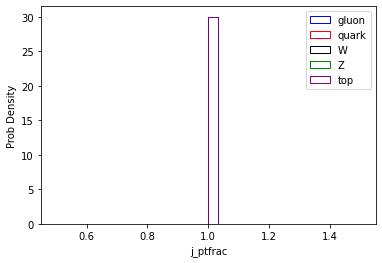

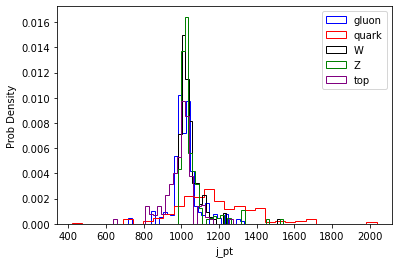

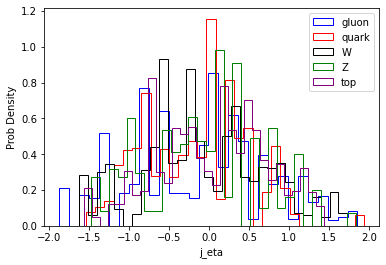

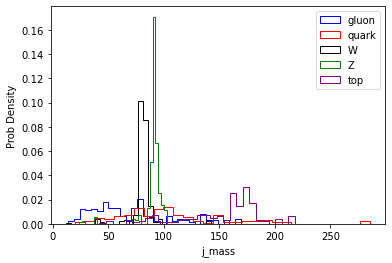

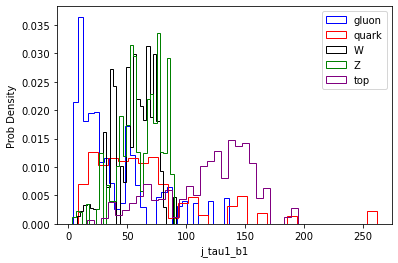

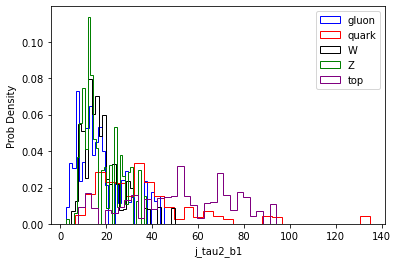

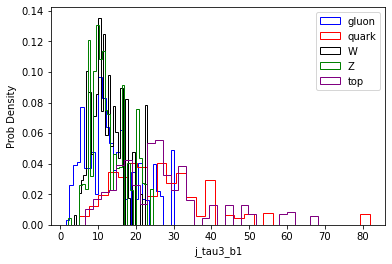

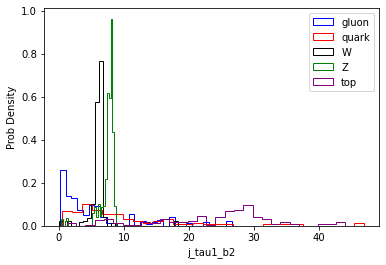

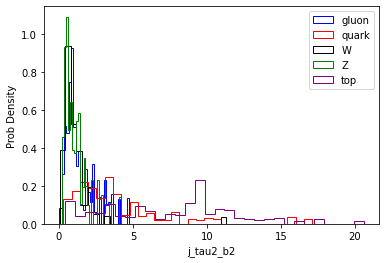

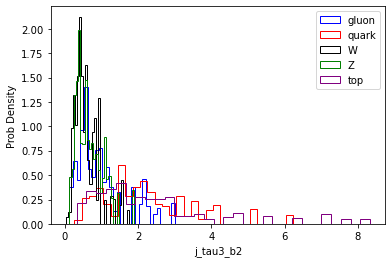

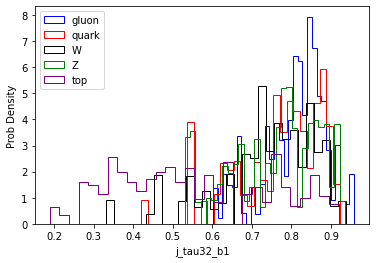

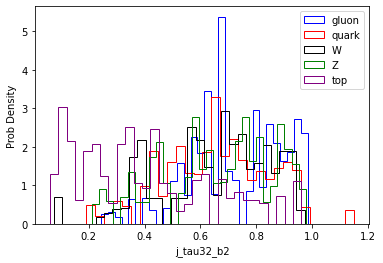

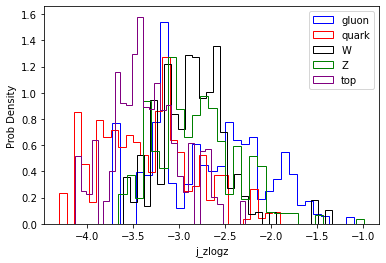

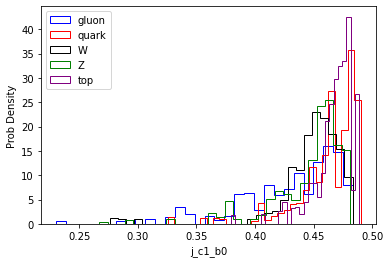

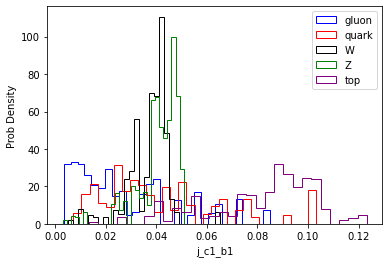

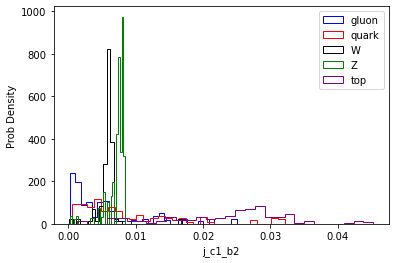

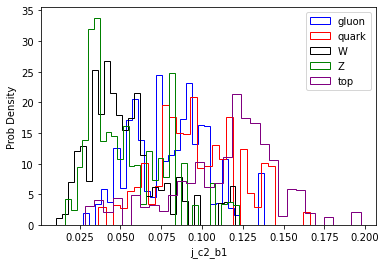

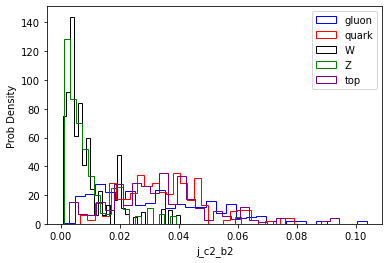

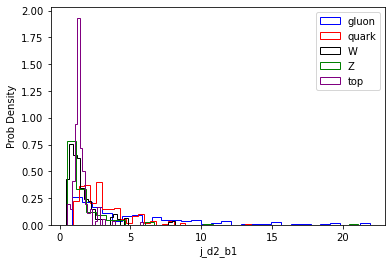

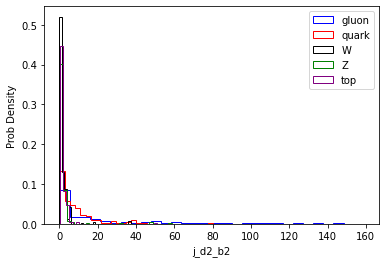

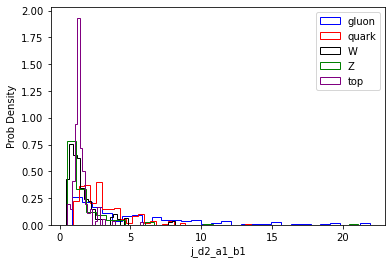

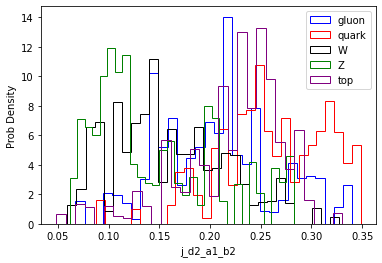

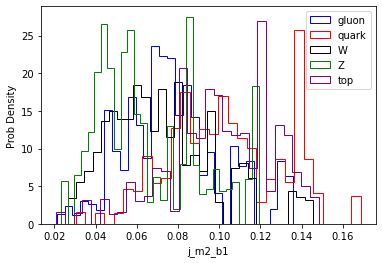

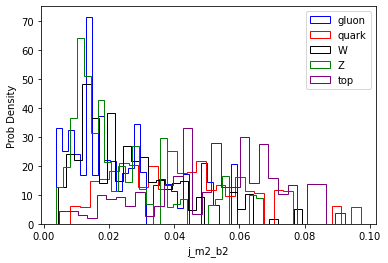

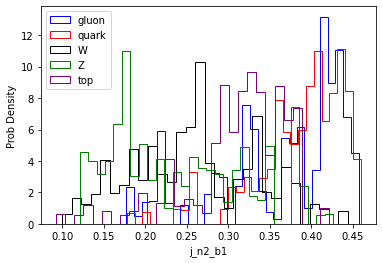

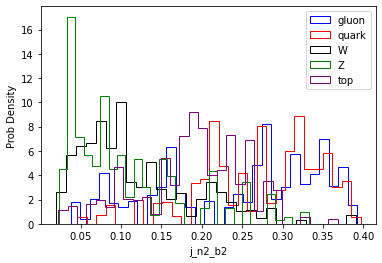

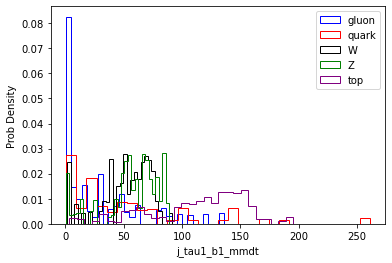

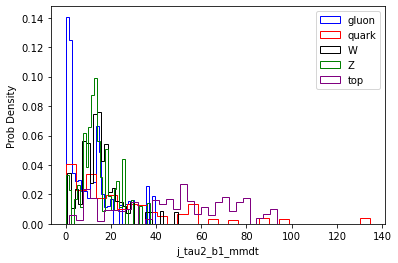

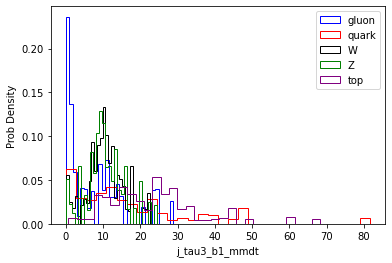

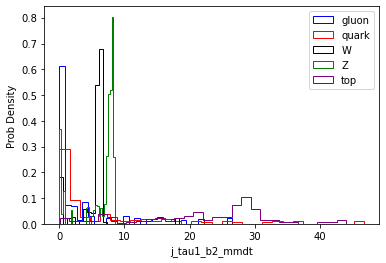

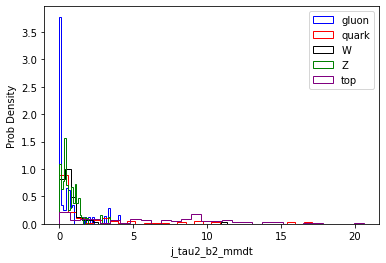

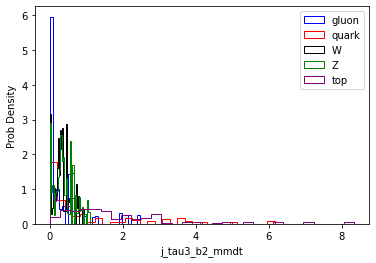

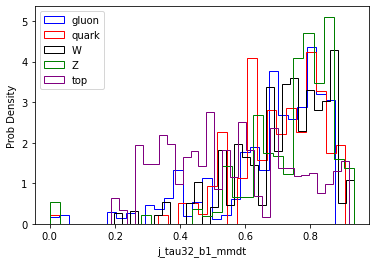

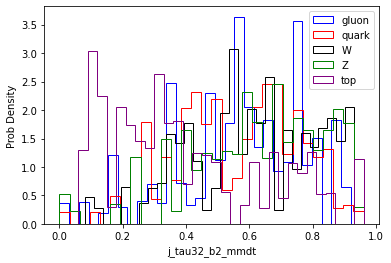

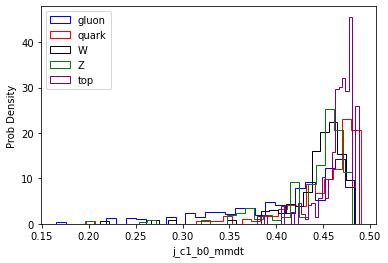

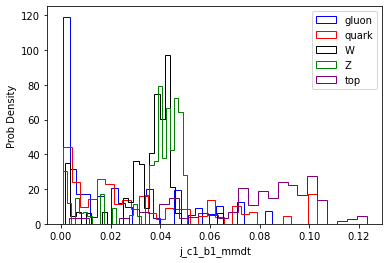

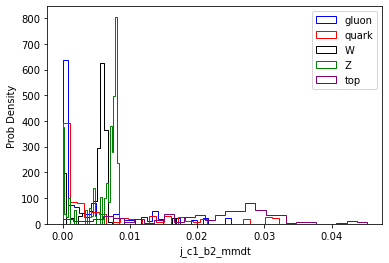

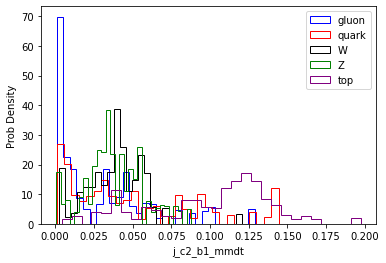

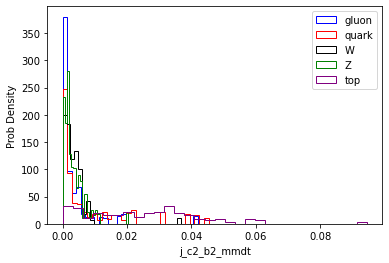

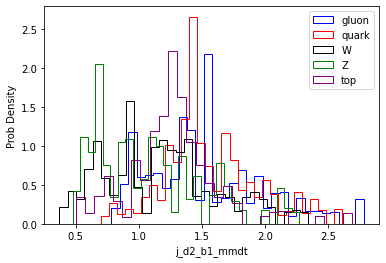

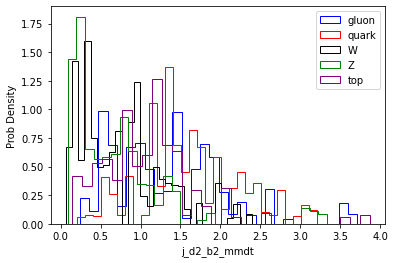

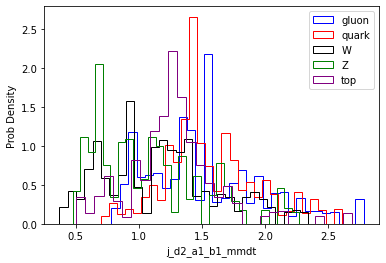

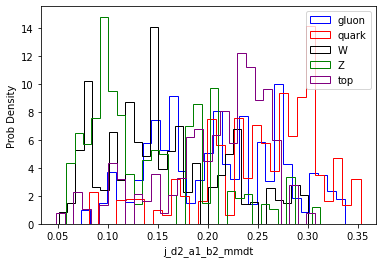

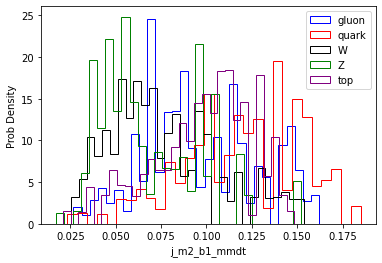

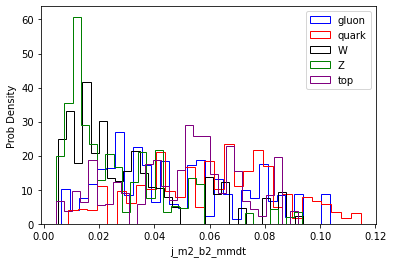

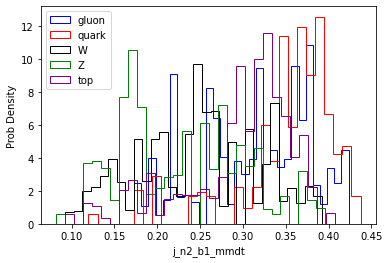

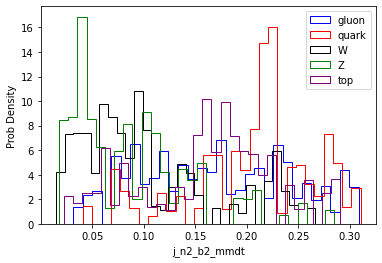

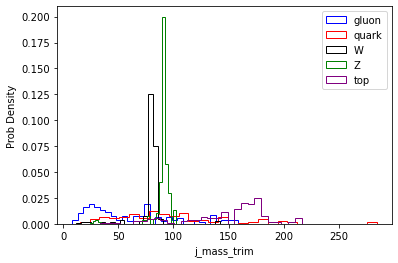

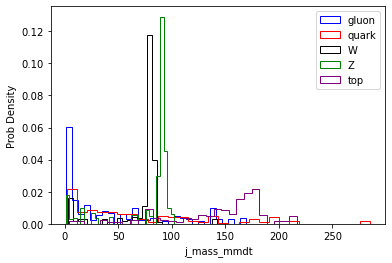

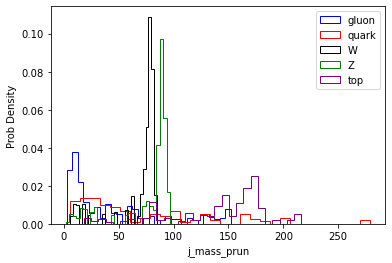

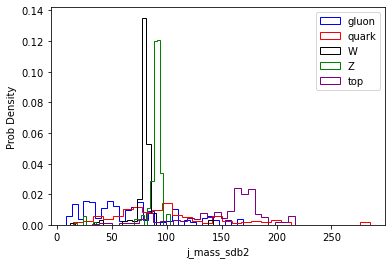

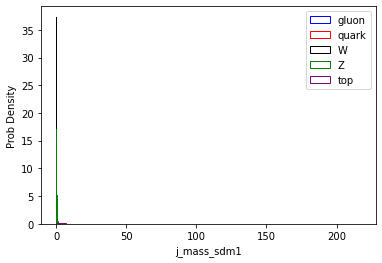

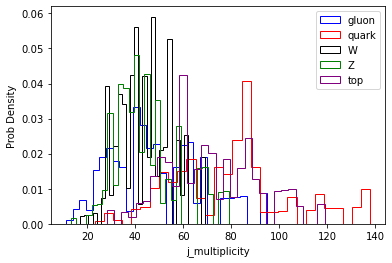

In [9]:
features = ['j_ptfrac', 'j_pt', 'j_eta', 'j_mass', 'j_tau1_b1', 'j_tau2_b1',
       'j_tau3_b1', 'j_tau1_b2', 'j_tau2_b2', 'j_tau3_b2', 'j_tau32_b1',
       'j_tau32_b2', 'j_zlogz', 'j_c1_b0', 'j_c1_b1', 'j_c1_b2', 'j_c2_b1',
       'j_c2_b2', 'j_d2_b1', 'j_d2_b2', 'j_d2_a1_b1', 'j_d2_a1_b2', 'j_m2_b1',
       'j_m2_b2', 'j_n2_b1', 'j_n2_b2', 'j_tau1_b1_mmdt', 'j_tau2_b1_mmdt',
       'j_tau3_b1_mmdt', 'j_tau1_b2_mmdt', 'j_tau2_b2_mmdt', 'j_tau3_b2_mmdt',
       'j_tau32_b1_mmdt', 'j_tau32_b2_mmdt', 'j_c1_b0_mmdt', 'j_c1_b1_mmdt',
       'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 'j_d2_b1_mmdt',
       'j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 'j_m2_b1_mmdt',
       'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 'j_n2_b2_mmdt', 'j_mass_trim',
       'j_mass_mmdt', 'j_mass_prun', 'j_mass_sdb2', 'j_mass_sdm1',
       'j_multiplicity']
for y in features:
    plot_1D(y)

## 3. Jet Image Plotting

Image-based neural networks are common in machine learning. After we processed the jets into images, we can implement different image-based neural networks such as Convolutional Neural Networks 2D(CNN2D), ResNet-50.

We will use `samples.csv` as our example data for practicing jet image processing. Take what we need from the data:

Inputs features:
- j1_ptrel
- j1_etarot
- j1_phirot
- j_index
    
Labels:
- j_g
- j_q
- j_w
- j_z
- j_t
- j_index

We put `j_index` in both categories since we need it to identify where the constituent is in which jet.

In [10]:
load_path = "data/samples"
df = pd.read_hdf(load_path+".h5", key="data")
features = ['j1_ptrel', 'j1_etarot', 'j1_phirot', 'j_index']
labels = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t', 'j_index']
features_labels_df = df[list(set(features+labels))]

Then, we separate the data into two categories, input features and jet labels, which correspond to X and y in later traning process.

In [11]:
features_df = features_labels_df[features]
labels_df = features_labels_df[labels]
# Convert to numpy array 
features_val = features_df.values
labels_val = labels_df.values
if 'j_index' in features:
    features_val = features_val[:,:-1] # drop the j_index feature
if 'j_index' in labels:
    labels_val = labels_val[:,:-1] # drop the j_index label

We need to convert jet into a 2D image, which in this case, will be a 40x40 image. The range in horizontal axis is from -0.8 to 0.8 and that in vertical axis is from -1 to 1.

In [12]:
BinsX = 40
BinsY = 40
MinX = -0.8
MaxX = 0.8
MinY = -1.0
MaxY = 1.0
features_2dval = np.zeros((len(labels_df), BinsX, BinsY, 1))
for i in range(0, len(labels_df)):
    features_df_i = features_df[features_df['j_index']==labels_df['j_index'].iloc[i]]
    index_values = features_df_i.index.values

    xbins = np.linspace(MinX, MaxX, BinsX+1)
    ybins = np.linspace(MinY, MaxY, BinsY+1)

    x = features_df_i[features[2]] # horizontal location
    y = features_df_i[features[1]] # vertical location
    w = features_df_i[features[0]] # weight at that location

    hist, xedges, yedges = np.histogram2d(x, y, weights=w, bins=(xbins,ybins)) # Use np.histogram2d to plot the image

    for ix in range(0, BinsX):
        for iy in range(0, BinsY):
            features_2dval[i,ix,iy,0] = hist[ix,iy] # put the image into the array
features_val = features_2dval

Check `features_val` shape, which will be `(25985, 40, 40, 1)`, corresponds to `(total_jets, horizontal_bins, vertical_bins, one_image_per_jet)`

In [13]:
# TODO
# Check the shape of array features_val
features_val.shape

(25985, 40, 40, 1)

## 4. Train Test Split

`train_test_split` is a method in scikit-learn package to split the data into two parts, one for training and another for testing the training result. There are 4 output parameters for this method. X_train, X_test, y_train, y_test. For detailed explanation, click this [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) to check documentation.

In linear regressing, we use X, the independent variables or the predictors, to predict y, the dependent variable or the response. In our case, X is the input features and y is the labels. We strongly recommand that 4 output parameters should be named in such scheme.

`test_size` is to determine the portion that split into X_test and y_test. We choose `random_state` to be 42, so that the data will always split in the same way as the last time we use this method.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_val, labels_val, test_size=0.2, random_state=42)

You can check shape for all 4 output parameters to see how changing test_size would affect the X_test and y_test. The shapes should be:
+ `X_train (20788, 40, 40, 1)`
+ `X_test  (5197, 40, 40, 1)`
+ `y_train (20788, 5)`
+ `y_test  (5197, 5)`

In [15]:
# TODO
# Check the shapes for these arrays
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20788, 40, 40, 1)
(5197, 40, 40, 1)
(20788, 5)
(5197, 5)


### Excercise

Now you have all your data prepared for training in neural networks, try to plot the heatmap for all 5 labels before we head to the training process. Remember, every entry in X has a corresponding entry in y.

You can find multiple ways to plot the heatmap, `matplotlib` would be a good package to use as start point.

In [16]:
import matplotlib.pyplot as plt
q_plt = np.zeros([40, 40])
g_plt = np.zeros([40, 40])
w_plt = np.zeros([40, 40])
z_plt = np.zeros([40, 40])
t_plt = np.zeros([40, 40])
for x in range(0, len(X_train)):
    if y_train[x, :][0] == 1:
        g_plt += X_train[x, :, :, 0]
    elif y_train[x, :][1] == 1:
        q_plt += X_train[x, :, :, 0]
    elif y_train[x, :][2] == 1:
        w_plt += X_train[x, :, :, 0]
    elif y_train[x, :][3] == 1:
        z_plt += X_train[x, :, :, 0]
    elif y_train[x, :][4] == 1:
        t_plt += X_train[x, :, :, 0]
import matplotlib.colors as colors
def heatmap(input_array):
    plt.imshow(input_array, cmap='viridis', norm=colors.LogNorm(vmin=1), origin='lower')
    plt.colorbar()
    plt.show()

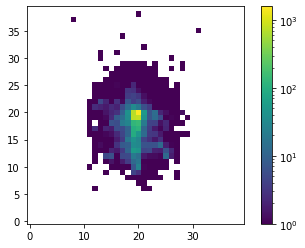

In [17]:
heatmap(g_plt)

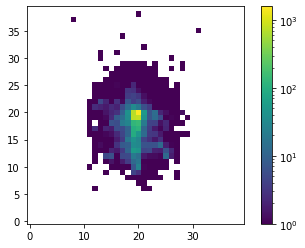

In [18]:
heatmap(g_plt)

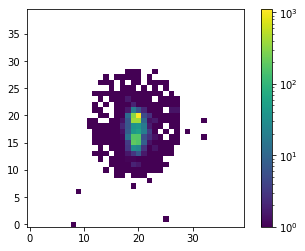

In [19]:
heatmap(w_plt)

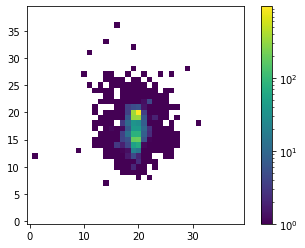

In [20]:
heatmap(z_plt)

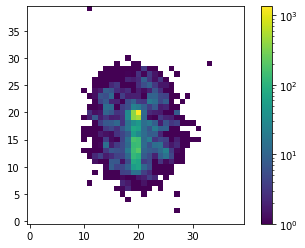

In [21]:
heatmap(t_plt)